In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline


from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [19]:
data = pd.read_csv('BigDataViz.csv')

In [20]:
data.head()

,ID,additions,deletions,num_easy_y1,year,status
0,1,0.000000,0.000000,0.30103,2010,new
1,2,1.863323,1.431364,0.30103,2010,new
2,3,0.477121,0.000000,0.30103,2011,new
3,4,1.968483,1.643453,0.30103,2011,new
4,5,3.756927,3.761211,0.30103,2011,new


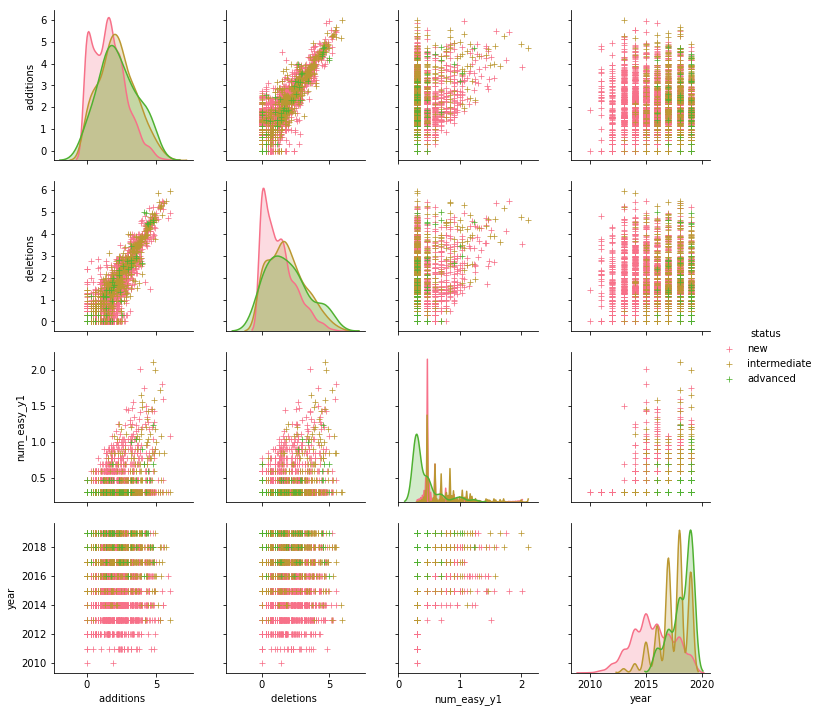

In [21]:
tmp = data.drop('ID', axis=1)
g = sns.pairplot(tmp, hue='status', markers='+')
plt.show()

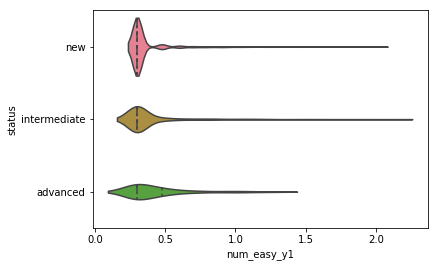

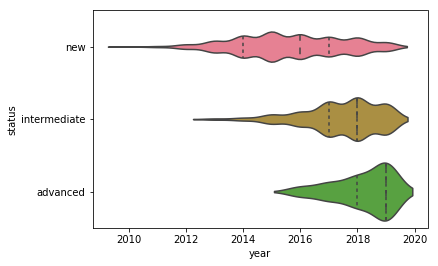

In [22]:
g = sns.violinplot(y='status', x='num_easy_y1', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='status', x='year', data=data, inner='quartile')
plt.show()

In [23]:
gk = data.groupby('status')

In [24]:
gk.describe()

ID                                                     \
               count         mean          std     min      25%     50%   
status                                                                    
advanced        47.0  3322.425532   593.177103  1731.0  3059.50  3608.0   
intermediate   541.0  2876.451017   807.170079   145.0  2446.00  3018.0   
new           3354.0  1806.600775  1108.039625     1.0   853.25  1733.5   

                             additions             ... num_easy_y1            \
                 75%     max      count      mean  ...         75%       max   
status                                             ...                         
advanced      3777.5  3930.0       47.0  2.266905  ...    0.477121  1.230449   
intermediate  3553.0  3937.0      541.0  2.198233  ...    0.301030  2.113943   
new           2717.5  3942.0     3354.0  1.589117  ...    0.301030  2.017033   

                year                                                         \
               count         mean       std     min     25%     50%     75%   
status                                                                        
advanced        47.0  2018.191489  0.992106  2016.0  2018.0  2019.0  2019.0   
intermediate   541.0  2017.426987  1.322432  2013.0  2017.0  2018.0  2018.0   
new           3354.0  2015.643113  1.846302  2010.0  2014.0  2016.0  2017.0   

                      
                 max  
status                
advanced      2019.0  
intermediate  2019.0  
new           2019.0  

[3 rows x 40 columns]

In [25]:
gk.head()

,ID,additions,deletions,num_easy_y1,year,status
0,1,0.000000,0.000000,0.301030,2010,new
1,2,1.863323,1.431364,0.301030,2010,new
2,3,0.477121,0.000000,0.301030,2011,new
3,4,1.968483,1.643453,0.301030,2011,new
4,5,3.756927,3.761211,0.301030,2011,new
144,145,4.229273,3.884455,0.301030,2013,intermediate
162,163,5.996116,5.956517,0.301030,2013,intermediate
267,268,5.289879,5.233423,0.301030,2013,intermediate
304,305,0.477121,0.477121,0.301030,2013,intermediate
371,372,0.000000,0.000000,0.301030,2013,intermediate


In [26]:
gk['num_easy_y1'].describe()

,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
advanced,47.0,0.433510,0.224280,0.30103,0.30103,0.30103,0.477121,1.230449
intermediate,541.0,0.399009,0.252851,0.30103,0.30103,0.30103,0.301030,2.113943
new,3354.0,0.358540,0.165861,0.30103,0.30103,0.30103,0.301030,2.017033
